In [1]:
cd /Users/akshitasingh/Downloads/273A_ML/1_MLProject

/Users/akshitasingh/Downloads/273A_ML/1_MLProject


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)

from collections import defaultdict

np.random.seed(100)

In [3]:
# sklearn imports
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix

# other stats/math imports
import math
from scipy.stats import chi2_contingency

In [4]:
train_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/train_data.csv", delimiter=None) 
test_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/test_data.csv", delimiter=None) 

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

train_data = train_data.drop(['Unnamed: 0'], axis = 1)
test_data = test_data.drop(['Unnamed: 0'], axis = 1)

Xtr = train_data.iloc[:, :-1]
Ytr = train_data.iloc[:, -1]

Xte = test_data.iloc[:, :-1]
Yte = test_data.iloc[:, -1]

# Training Ensembles

### Ensembles Pipeline, Grid

In [5]:
scoring = ['balanced_accuracy', 'accuracy', 'roc_auc', 'recall', 'precision']

lr = np.linspace(.01, .2, num= 4)
min_split = np.linspace(0.1, 0.5, 4)
min_leaf = np.linspace(0.1, 0.5, 4)
max_depth = np.linspace(2, 9, num= 4)
max_features = ["log2","sqrt"]
subs = np.linspace(.5, 1, num= 2)
n_est = [10]
scoring = ['recall', 'accuracy']


parameters = {
    "loss":["deviance"],
    "learning_rate": lr,
    "min_samples_split": min_split,
    "min_samples_leaf": min_leaf,
    "max_depth": max_depth,
#     "max_features": max_features,
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample": subs,
#     "n_estimators": n_est
    }


#passing the scoring function in the GridSearchCV
grid = GridSearchCV(GradientBoostingClassifier(), parameters, refit=False,cv=2)


In [6]:
chosen_model = grid.fit(Xtr,Ytr)

In [7]:
chosen_model

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.01      , 0.07333333, 0.13666667, 0.2       ]),
                         'loss': ['deviance'],
                         'max_depth': array([2.        , 4.33333333, 6.66666667, 9.        ]),
                         'min_samples_leaf': array([0.1       , 0.23333333, 0.36666667, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.23333333, 0.36666667, 0.5       ])},
             refit=False)

In [8]:
print(chosen_model.best_params_)

{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 6.666666666666667, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3666666666666667}


In [9]:
clf = GradientBoostingClassifier(learning_rate = 0.2, loss = 'deviance', n_estimators=100, 
                                  min_samples_leaf = .1, min_samples_split = .366,
                                 max_depth= 6, random_state= 100).fit(Xtr, Ytr)

Text(0.5, 0, 'False Positive Rate')

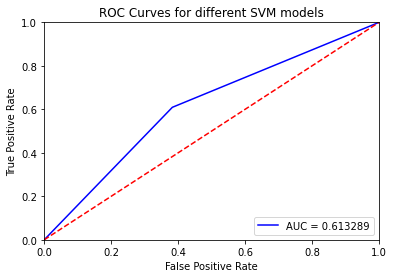

In [10]:
YteH = clf.predict(Xte)
fpr, tpr, threshold = metrics.roc_curve(Yte, YteH)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b' , label = 'AUC = %0.6f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC Curves for different SVM models')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


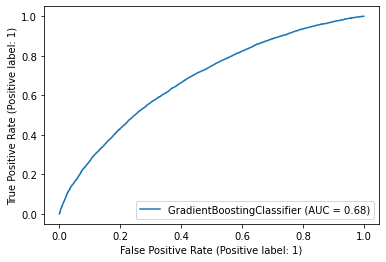

In [11]:
metrics.plot_roc_curve(clf, Xtr, Ytr)

In [12]:
cross_val_score(clf, Xtr, Ytr, cv = 4).mean()

0.617629802965669

In [13]:
cross_val_score(clf, Xtr, Ytr, cv = 4).var()

6.408312432125975e-05

In [14]:
# # get false and true positive rates
# fpr, tpr, thresholds = roc_curve(Yte, probas[:,0], pos_label=0)

# # get area under the curve
# roc_auc = auc(fpr, tpr)

# # PLOT ROC curve
# plt.figure(dpi=150)
# plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
# plt.title('ROC Curve for RF classifier')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate (Recall)')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.legend()
# plt.show()

In [15]:
YteH = clf.predict(Xte)
accuracy_score(YteH, Yte)

0.6153344208809135